### Imports and Utility-Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%run ./library/traffic_simulation.py
%run ../utils/helper.py

In [2]:
def draw_lines_based_on_points_on_plot(points, ax=None, line_color='blue', line_size=0.5):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(points[:, 0], points[:, 1], color=line_color, linewidth=line_size)

    return ax

def draw_points_on_plot(point_sequence, ax, line_color, point_size=1):
    x, y = zip(*point_sequence)
    ax.scatter(x, y, color=line_color, s=point_size)
    return ax

In [3]:
def visualize_line_change_by_theta(line, theta):
    new_endpoint = calculate_rotated_line(line[0], line[1], theta)
    new_line = [line[1], new_endpoint]
    
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'r-', label='Original Line')

    # Plot the new line
    plt.plot([new_line[0][0], new_line[1][0]], [new_line[0][1], new_line[1][1]], 'b-', label='New Line')
    
    # Plotting points for clarity
    plt.scatter(*line[0], color='red', zorder=5)
    plt.scatter(*line[1], color='red', zorder=5)
    plt.scatter(*new_line[0], color='blue', zorder=5)
    plt.scatter(*new_line[1], color='blue', zorder=5)
    
    # Labeling the points
    plt.text(line[0][0], line[0][1], 'A', fontsize=12, ha='right')
    plt.text(line[1][0], line[1][1], 'B', fontsize=12, ha='right')
    plt.text(new_line[1][0], new_line[1][1], "B'", fontsize=12, ha='right')
    
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.title('Visualizing Line Transformation')
    plt.show()


In [4]:
# a bit dirty. A good way to redraw
def redraw_initial_sketch():
    fig, ax = plt.subplots()
    ax.set_xlim(-30, 80)
    ax.set_ylim(-20, 70)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    
    angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
    rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
    init_point_sequence = [[0, 5], [1, 5]]
    point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
    ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')
    
    angle_count_tuples = [[0, 60], [6, 15], [0, 20], [6, 15], [0, 60], [6, 15], [0, 20], [6, 15]]
    rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
    init_point_sequence = [[-0.5, 1], [0.5, 1]]
    point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
    ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='red')

    return fig, ax

### Theory


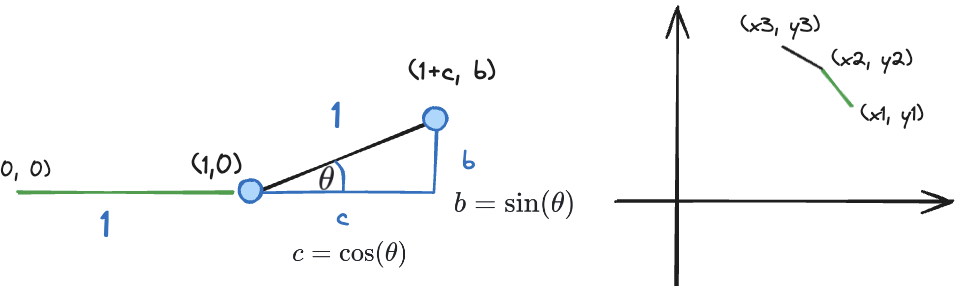
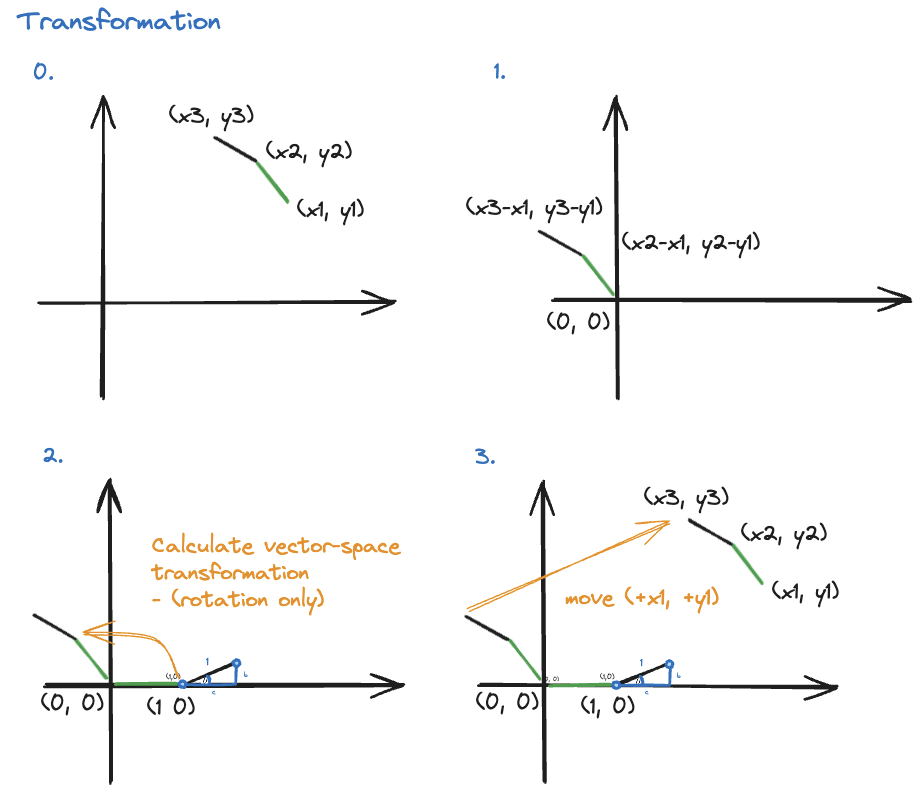

In [5]:
html(calculate_rotated_line)

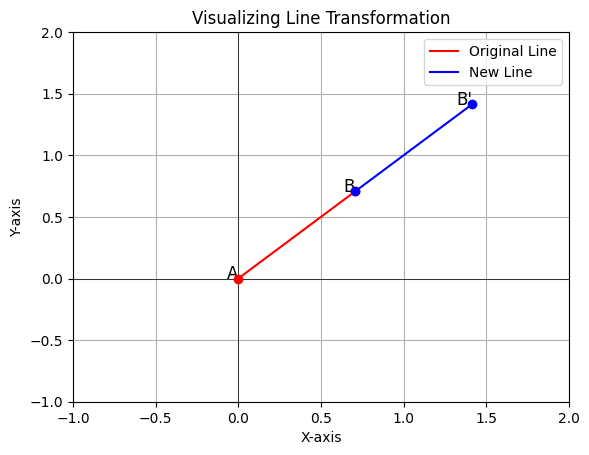

In [6]:
line = [[0, 0], [0.7071, 0.7071]]
theta = np.radians(0)
visualize_line_change_by_theta(line, theta)

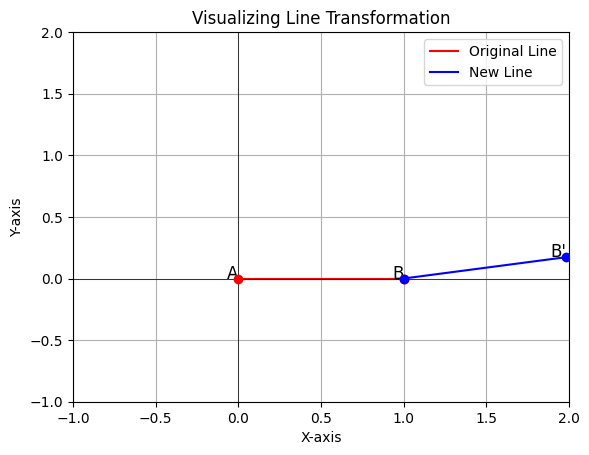

In [7]:
line = [[0, 0], [1, 0]]
theta = np.radians(10)
visualize_line_change_by_theta(line, theta)

### Streets-Building

In [8]:
def calc_roation_angles_from_tuple(angle_count_tuples):
    return np.radians(np.repeat([angle for angle, count in angle_count_tuples], [count for angle, count in angle_count_tuples]))

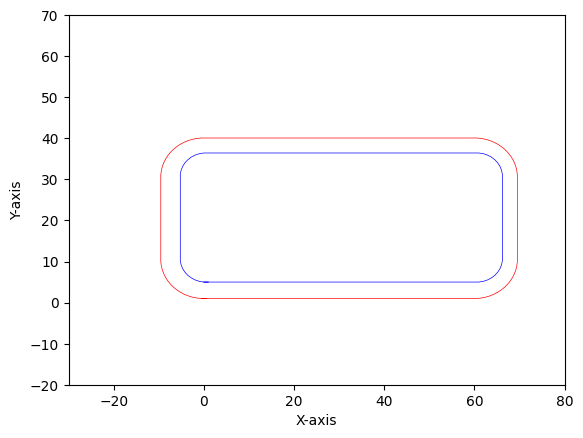

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(-30, 80)
ax.set_ylim(-20, 70)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[0, 5], [1, 5]]
point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')

angle_count_tuples = [[0, 60], [6, 15], [0, 20], [6, 15], [0, 60], [6, 15], [0, 20], [6, 15]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[-0.5, 1], [0.5, 1]]
point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='red')

plt.show()

### Car-Simulation

In [11]:
scatter_one = ax.scatter([], [], c='green', s=10)
scatter_two = ax.scatter([], [], c='orange', s=10)
time_scale = 5

def update(i):
    global ax, scatter_one, scatter_two, time_scale, point_sequence_one, point_sequence_two
    
    points_indices_one = np.mod(time_scale * np.array([2*i, i+20, i+50]), point_sequence_one.shape[0])
    points_indices_two = np.mod(time_scale * np.array([i+5, i+30, i+50]), point_sequence_two.shape[0])
    
    points_one = np.array([point_sequence_one[index] for index in points_indices_one])
    points_two = np.array([point_sequence_two[index] for index in points_indices_two])
    
    scatter_one.set_offsets(points_one)
    scatter_two.set_offsets(points_two)
    
    return scatter_one, scatter_two

ani = FuncAnimation(fig, update, frames=range(200), repeat=True, blit=True)
plt.close(fig)
HTML(ani.to_html5_video())

In [12]:
N = 1000000
time_scale = 1
indices = np.arange(N)

indices_1 = np.mod(time_scale * np.array([2*indices, indices+20, indices+50]), point_sequence_one.shape[0])
indices_2 = np.mod(time_scale * np.array([indices+5, indices+30, indices+50]), point_sequence_two.shape[0])

points_one = point_sequence_one[indices_1]
points_two = point_sequence_two[indices_2]

#### Torch-Operations

In [20]:
import torch

def fill_zero_places(a):
    a = torch.cat([torch.tensor([-1], device=a.device), a])
    nonzero_indices = torch.nonzero(a).squeeze()
    diff = torch.diff(torch.cat([nonzero_indices, torch.tensor([a.shape[0]], device=a.device)]))
    b = a[nonzero_indices].repeat_interleave(diff)
    b[b < 0] = 0
    c = b[1:]
    return c

def shift_values_to_next_available_zero(a):
    b = (a > 0).int()
    b = torch.cat([torch.tensor([0], device=a.device), b])
    c = torch.arange(b.shape[0], device=a.device) * b
    c[-1] = 0
    d = c[1:]
    e = torch.roll(fill_zero_places(d), 1)
    e[0] = 0
    f = torch.zeros_like(a)
    f.scatter_add_(0, e.long(), a)
    return f

def fill_zero_values_ascending_rest_with_zero(a):
    b = (a > 0).int()
    cumsum = torch.cumsum(1 - b, dim=0)
    c = (cumsum * (1 - b) - torch.maximum(b * cumsum, torch.zeros_like(cumsum)).cummax(dim=0)[0]) * (1 - b)
    return c

def find_one_zero_pattern(a):
    b = torch.roll(a.int(), -1)
    b[-1] = 1
    c = a - b
    d = (c == 1).int()
    return d

def fill_zero_values_descending_rest_with_zero(a):
    b = fill_zero_values_ascending_rest_with_zero(a)
    c = (b > 0).int()
    d = find_one_zero_pattern(c)
    e = d * b
    f = shift_values_to_next_available_zero(e)
    g = fill_zero_places(f)
    h = ((g + 1) - b) * c
    return h

def find_values_that_must_be_reordered(a):
    b = torch.arange(1, a.shape[0] + 1)
    c = a - b
    d, _ = torch.cummin(c.flip(0), dim=0)
    d = d.flip(0)
    e = (c == d).int()

    return 1 - e

def adjust_cars_no_lane_change(a):
    b = 1 - find_values_that_must_be_reordered(a)
    c = fill_zero_values_descending_rest_with_zero(b)
    d = a * b
    e = shift_values_to_next_available_zero(d)
    f = fill_zero_places(e)
    g = f - c

    return g

#### Add cars to lanes, Respect other cars, Change lane

In [21]:
def index_order_for_cars_in_lanes(car_specifications, lanes):
    lane_indices = np.array([car_specifications[car_specifications[:, 1] == i, 2].astype(int) for i in lanes])
    car_indicies = np.array([car_specifications[car_specifications[:, 1] == i, 0].astype(int) for i in lanes])
    return np.take_along_axis(car_indicies, np.argsort(lane_indices), axis=1)

In [22]:
def update_lane_indicies(car_specifications, lane_num_tracks):
    car_specifications[:, 2] = np.mod(car_specifications[:, 3] + car_specifications[:, 2], lane_num_tracks[car_specifications[:, 1].astype(int)])
    return car_specifications

In [23]:
def update_lane_indicies_with_overtake(car_specifications, lane_num_tracks, lanes):
    index_order = index_order_for_cars_in_lanes(car_specifications, lanes)
    car_specifications[:, 2] = np.mod(car_specifications[:, 3] + car_specifications[:, 2], lane_num_tracks[car_specifications[:, 1].astype(int)])
    updated_index_order = index_order_for_cars_in_lanes(car_specifications, lanes)

    
    # on collison, do not overtake
    
    return car_specifications

In [24]:
# car_lane_zero = point_sequence_one
# car_lane_one = point_sequence_two

# lanes = np.array([0, 1])
# lane_num_tracks = np.array([point_sequence_one.shape[0], point_sequence_two.shape[0]])

# # car consists of id, driving_lane, point_index, speed and chance of swapping lane if waiting behind other car
# car_specifications = np.array([
#     [1, 0, 1, 3, 0.01], [2, 0, 20, 10, 0.01], [3, 0, 30, 3, 0.01], [4, 1, 5, 5, 0.01], [5, 1, 10, 7, 0.01], [6, 1, 25, 10, 0.01]
# ])

#### Speed-Up

In [25]:
lane_num_tracks = np.array([198, 222])
cars_position = np.arange(0, 30)
cars_speed = np.random.randint(0,10, (30, 1)).flatten()

cars_position, cars_speed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([6, 1, 8, 8, 5, 7, 0, 1, 4, 9, 5, 5, 2, 8, 8, 1, 3, 2, 3, 9, 8, 6,
        0, 6, 0, 1, 3, 5, 7, 0]))

#### Driving but no overtake

In [27]:
a = torch.tensor([ 83,  84,  89,  93,  87,  92,  90,  95,  90,  94,  94,  96,  97, 101,  97, 105, 104,  99, 101, 101, 101, 110, 105, 111, 106, 115, 90,  86, 107,  59])
adjust_cars_no_lane_change(a)

RuntimeError: zero-dimensional tensor (at position 0) cannot be concatenated

In [ ]:
cars_position = adjust_cars_no_lane_change(cars_position + cars_speed)
cars_position

In [ ]:
# fig, ax = redraw_initial_sketch()

# scatter_one = ax.scatter([], [], c='green', s=10)
# scatter_two = ax.scatter([], [], c='orange', s=10)

# def update(i):
#     global ax, scatter_one, scatter_two, point_sequence_one, point_sequence_two, car_specifications
    
#     points_one_indicies = car_specifications[car_specifications[:, 1].astype(int) == 0][:, 2].astype(int)
#     points_two_indicies = car_specifications[car_specifications[:, 1].astype(int) == 1][:, 2].astype(int)
    
#     points_one = point_sequence_one[points_one_indicies]
#     points_two = point_sequence_two[points_two_indicies]
    
#     scatter_one.set_offsets(points_one)
#     scatter_two.set_offsets(points_two)

#     lane_num_tracks = np.array([point_sequence_one.shape[0], point_sequence_two.shape[0]])
#     car_specifications = update_lane_indicies(car_specifications, lane_num_tracks)
#     # print(points_one)
    
#     return scatter_one, scatter_two

# ani = FuncAnimation(fig, update, frames=range(200), repeat=True, blit=True)
# plt.close(fig)
# HTML(ani.to_html5_video())

### Recording form fixed-car

### Recording from

### Replay from Recording